In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:

file_path='/content/drive/MyDrive/inter_IIT_ISRO/ISRO.data_collection_v4.json'

df=pd.read_json(file_path)

In [4]:
# area=pd.read_csv("/content/drive/MyDrive/inter_IIT_ISRO/sampled-curve.txt")

In [5]:
# al_area_x_kev = 1.48
# # Perform linear interpolation
# al_area_y = area.set_index("x").reindex(
#     pd.concat([area["x"], pd.Series(al_area_x_kev)]).sort_values()  # Use pd.concat to combine Series
# ).interpolate(method="linear").loc[al_area_x_kev, "y"]

# print(al_area_y)

# mg_area_x_kev = 1.25
# mg_area_y = area.set_index("x").reindex(
#     pd.concat([area["x"], pd.Series(mg_area_x_kev)]).sort_values()
# ).interpolate(method="linear").loc[mg_area_x_kev, "y"]

# print(mg_area_y)

# si_area_x_kev = 1.74
# si_area_y = area.set_index("x").reindex(
#     pd.concat([area["x"], pd.Series(si_area_x_kev)]).sort_values()
# ).interpolate(method="linear").loc[si_area_x_kev, "y"]

# print(si_area_y)

# ca_area_x_kev = 3.69
# ca_area_y = area.set_index("x").reindex(
#     pd.concat([area["x"], pd.Series(ca_area_x_kev)]).sort_values()
# ).interpolate(method="linear").loc[ca_area_x_kev, "y"]

# print(ca_area_y)


# ti_area_x_kev = 4.51
# ti_area_y = area.set_index("x").reindex(
#     pd.concat([area["x"], pd.Series(ti_area_x_kev)]).sort_values()
# ).interpolate(method="linear").loc[ti_area_x_kev, "y"]

# print(ti_area_y)


# fe_area_x_kev = 6.40
# fe_area_y = area.set_index("x").reindex(
#     pd.concat([area["x"], pd.Series(fe_area_x_kev)]).sort_values()
# ).interpolate(method="linear").loc[fe_area_x_kev, "y"]

# print(fe_area_y)


In [6]:
for element in df['wt'][1].keys():  # Loop over the keys of the dictionary in the second row
    # Create a new column with 'wt_' prefix
    column_name = f"wt_{element}"
    df[column_name] = df['wt'].apply(lambda x: x.get(element))

In [7]:
for element in df['true_wt'][1].keys():  # Loop over the keys of the dictionary in the second row
    # Create a new column with 'wt_' prefix
    column_name = f"true_wt_{element}"
    df[column_name] = df['true_wt'].apply(lambda x: x.get(element))

In [8]:
for element in df['dof'][1].keys():  # Loop over the keys of the dictionary in the second row
    # Create a new column with 'wt_' prefix
    column_name = f"dof_{element}"
    df[column_name] = df['dof'].apply(lambda x: x.get(element))

In [9]:

for element in df['chi_2'][1].keys():  # Loop over the keys of the dictionary in the second row
    # Create a new column with 'wt_' prefix
    column_name = f"chi_2_{element}"
    df[column_name] = df['chi_2'].apply(lambda x: x.get(element))

In [10]:
for element in df['computed_metadata'][1].keys():  # Loop over the keys of the dictionary in the second row
    # Create a new column with 'wt_' prefix
    column_name = f"{element}"
    df[column_name] = df['computed_metadata'].apply(lambda x: x.get(element))

In [ ]:
len(df)

22182

In [ ]:
df.columns

Index(['_id', 'latitude', 'longitude', 'filepath', 'true_wt', 'status',
       'last_served', 'chi_2', 'computed_metadata', 'dof', 'photon_count',
       'wt', 'wt_mg', 'wt_al', 'wt_si', 'wt_ca', 'wt_ti', 'wt_fe',
       'true_wt_mg', 'true_wt_al', 'true_wt_si', 'true_wt_fe', 'dof_mg',
       'dof_al', 'dof_si', 'dof_ca', 'dof_ti', 'dof_fe', 'chi_2_mg',
       'chi_2_al', 'chi_2_si', 'chi_2_ca', 'chi_2_ti', 'chi_2_fe',
       'photon_counts', 'solar_zenith_angle', 'emission_angle',
       'solar_zenith_angle_cosec', 'emission_angle_cosec', 'altitude',
       'exposure', 'mid_utc', 'peak_na_h', 'peak_na_c', 'peak_mg_h',
       'peak_mg_c', 'peak_al_h', 'peak_al_c', 'peak_si_h', 'peak_si_c',
       'peak_ca_h', 'peak_ca_c', 'peak_ti_h', 'peak_ti_c', 'peak_fe_h',
       'peak_fe_c'],
      dtype='object')

In [ ]:
# # Extract latitude and longitude
# df['latitude'] = df['filepath'].str.extract(r'([-]?\d+\.\d+)_')  # Extract latitude
# df['longitude'] = df['filepath'].str.extract(r'_([-]?\d+\.\d+)\.')  # Extract longitude

# # Convert extracted values to float
# df['latitude'] = df['latitude'].astype(float)
# df['longitude'] = df['longitude'].astype(float)

In [ ]:
df['wt_al']=df['wt_al']
df['wt_ca']=df['wt_ca']
df['wt_fe']=df['wt_fe']
df['wt_mg']=df['wt_mg']
df['wt_si']=df['wt_si']
df['wt_ti']=df['wt_ti']

In [11]:
def classify_lunar_feature(latitude, longitude):
    # Primary classification: Highlands vs. Maria
    if (40 <= latitude <= 90 or -90 <= latitude <= -40) and -180 <= longitude <= 180:
        primary_class = "Highlands"
    elif -20 <= latitude <= 40 and -60 <= longitude <= 60:
        primary_class = "Maria"
    else:
        return "Highlands - General"


    if primary_class == "Highlands":
        if 40 <= latitude <= 60 and -40 <= longitude <= 10:
            return "Highlands - Mountain Ranges"
        elif 60 <= latitude <= 90 or -90 <= latitude <= -60:
            return "Highlands - Craters"
        elif 50 <= latitude <= 60 and -30 <= longitude <= -10:
            return "Highlands - Valleys"
        else:
            return "Highlands - General"
    elif primary_class == "Maria":
        if -10 <= latitude <= 40 and -60 <= longitude <= -20:
            return "Maria - Lunar Domes"
        elif -10 <= latitude <= 30 and -40 <= longitude <= 10:
            return "Maria - Rilles"
        else:
            return "Maria - Basaltic Plains"

In [12]:
df['Region']=df.apply(lambda row: classify_lunar_feature(row['latitude'],row['longitude']),axis=1)

In [13]:
def red_chi_2(element,df):
  df[f'red_chi_2_{element}']=df[f'chi_2_{element}']/(df[f'dof_{element}'])
  return df

In [14]:
df=red_chi_2('mg',df)
df=red_chi_2('al',df)
df=red_chi_2('si',df)
df=red_chi_2('fe',df)
df=red_chi_2('ti',df)
df=red_chi_2('ca',df)

In [ ]:
df.columns

Index(['_id', 'latitude', 'longitude', 'filepath', 'true_wt', 'status',
       'last_served', 'chi_2', 'computed_metadata', 'dof', 'photon_count',
       'wt', 'wt_mg', 'wt_al', 'wt_si', 'wt_ca', 'wt_ti', 'wt_fe',
       'true_wt_mg', 'true_wt_al', 'true_wt_si', 'true_wt_fe', 'dof_mg',
       'dof_al', 'dof_si', 'dof_ca', 'dof_ti', 'dof_fe', 'chi_2_mg',
       'chi_2_al', 'chi_2_si', 'chi_2_ca', 'chi_2_ti', 'chi_2_fe',
       'photon_counts', 'solar_zenith_angle', 'emission_angle',
       'solar_zenith_angle_cosec', 'emission_angle_cosec', 'altitude',
       'exposure', 'mid_utc', 'peak_na_h', 'peak_na_c', 'peak_mg_h',
       'peak_mg_c', 'peak_al_h', 'peak_al_c', 'peak_si_h', 'peak_si_c',
       'peak_ca_h', 'peak_ca_c', 'peak_ti_h', 'peak_ti_c', 'peak_fe_h',
       'peak_fe_c', 'Region', 'red_chi_2_mg', 'red_chi_2_al', 'red_chi_2_si',
       'red_chi_2_fe', 'red_chi_2_ti', 'red_chi_2_ca'],
      dtype='object')

In [15]:

# df=df.drop(columns=['_id', 'filepath', 'true_wt', 'computed_metadata', 'photon_count', 'wt',
#        'chi_2', 'dof', 'latitude', 'longitude'])
df=df.drop(columns=[ 'dof_mg', 'dof_al', 'dof_si', 'dof_ca', 'dof_ti',
       'dof_fe', 'chi_2_mg', 'chi_2_al', 'chi_2_si', 'chi_2_ca', 'chi_2_ti',
       'chi_2_fe'])
df=df.drop(columns=['solar_zenith_angle_cosec',
       'emission_angle_cosec'])

In [16]:
def one_hot_encode_region(df, column_name):
    """
    One-hot encodes the specified column in a DataFrame for the given regions.
    If the column is not present, raises an error.
    If the column contains values not in the predefined list, ignores them.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The column to one-hot encode.

    Returns:
        pd.DataFrame: DataFrame with one-hot encoded columns added.
    """
    # Predefined categories for one-hot encoding
    allowed_categories = [
        'Highlands - Craters',
        'Highlands - Mountain Ranges',
        'Maria - Basaltic Plains',
        'Maria - Lunar Domes',
        'Maria - Rilles',
        'Highlands - Valleys'
    ]

    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"The column '{column_name}' does not exist in the DataFrame.")

    # One-hot encoding logic
    for category in allowed_categories:
        encoded_column = f'Region_{category}'
        df[encoded_column] = (df[column_name] == category).astype(int)

    return df


In [ ]:
# one_hot_encoded = pd.get_dummies(df['Region'], prefix='Region')

# # Concatenate back to the original DataFrame (optional)
# data = pd.concat([df, one_hot_encoded], axis=1)
# data=data.drop(columns=['Region','Region_Highlands - General'])

In [17]:
data=one_hot_encode_region(df,'Region')

In [ ]:
data.columns

Index(['_id', 'latitude', 'longitude', 'filepath', 'true_wt', 'status',
       'last_served', 'chi_2', 'computed_metadata', 'dof', 'photon_count',
       'wt', 'wt_mg', 'wt_al', 'wt_si', 'wt_ca', 'wt_ti', 'wt_fe',
       'true_wt_mg', 'true_wt_al', 'true_wt_si', 'true_wt_fe', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
       'mid_utc', 'peak_na_h', 'peak_na_c', 'peak_mg_h', 'peak_mg_c',
       'peak_al_h', 'peak_al_c', 'peak_si_h', 'peak_si_c', 'peak_ca_h',
       'peak_ca_c', 'peak_ti_h', 'peak_ti_c', 'peak_fe_h', 'peak_fe_c',
       'Region', 'red_chi_2_mg', 'red_chi_2_al', 'red_chi_2_si',
       'red_chi_2_fe', 'red_chi_2_ti', 'red_chi_2_ca',
       'Region_Highlands - Craters', 'Region_Highlands - Mountain Ranges',
       'Region_Maria - Basaltic Plains', 'Region_Maria - Lunar Domes',
       'Region_Maria - Rilles', 'Region_Highlands - Valleys'],
      dtype='object')

In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

feature correctio

In [ ]:
data.columns

Index(['_id', 'latitude', 'longitude', 'filepath', 'true_wt', 'status',
       'last_served', 'chi_2', 'computed_metadata', 'dof', 'photon_count',
       'wt', 'wt_mg', 'wt_al', 'wt_si', 'wt_ca', 'wt_ti', 'wt_fe',
       'true_wt_mg', 'true_wt_al', 'true_wt_si', 'true_wt_fe', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
       'mid_utc', 'peak_na_h', 'peak_na_c', 'peak_mg_h', 'peak_mg_c',
       'peak_al_h', 'peak_al_c', 'peak_si_h', 'peak_si_c', 'peak_ca_h',
       'peak_ca_c', 'peak_ti_h', 'peak_ti_c', 'peak_fe_h', 'peak_fe_c',
       'Region', 'red_chi_2_mg', 'red_chi_2_al', 'red_chi_2_si',
       'red_chi_2_fe', 'red_chi_2_ti', 'red_chi_2_ca',
       'Region_Highlands - Craters', 'Region_Highlands - Mountain Ranges',
       'Region_Maria - Basaltic Plains', 'Region_Maria - Lunar Domes',
       'Region_Maria - Rilles', 'Region_Highlands - Valleys'],
      dtype='object')

In [ ]:
def ratio_error_to_df(df,el_1,el_2):
  df[f'{el_1}/{el_2}']=df[f'wt_{el_1}']/df[f'wt_{el_2}']
  df[f'true_{el_1}/{el_2}']=df[f'true_wt_{el_1}']/df[f'true_wt_{el_2}']
  # df[f'error_{el_1}/{el_2}']=abs(df[f'{el_1}/{el_2}']-df[f'true_{el_1}/{el_2}'])
  df[f'error_{el_1}/{el_2}']=df[f'{el_1}/{el_2}']-df[f'true_{el_1}/{el_2}']
  df[f'error_rate_{el_1}/{el_2}']=df[f'error_{el_1}/{el_2}']/df[f'true_{el_1}/{el_2}']

  return df

In [19]:
data['emission_angle']=90-data['emission_angle']
data['solar_zenith_angle']=90-data['solar_zenith_angle']

In [ ]:
# data=ratio_error_to_df(data,"mg","si")
# data=ratio_error_to_df(data,"al","si")
# # data=ratio_error_to_df(data,"ti","si")
# data=ratio_error_to_df(data,"fe","si")
# # data=ratio_error_to_df(data,"ca","si")




In [ ]:
data.columns

Index(['_id', 'latitude', 'longitude', 'filepath', 'true_wt', 'status',
       'last_served', 'chi_2', 'computed_metadata', 'dof', 'photon_count',
       'wt', 'wt_mg', 'wt_al', 'wt_si', 'wt_ca', 'wt_ti', 'wt_fe',
       'true_wt_mg', 'true_wt_al', 'true_wt_si', 'true_wt_fe', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
       'mid_utc', 'peak_na_h', 'peak_na_c', 'peak_mg_h', 'peak_mg_c',
       'peak_al_h', 'peak_al_c', 'peak_si_h', 'peak_si_c', 'peak_ca_h',
       'peak_ca_c', 'peak_ti_h', 'peak_ti_c', 'peak_fe_h', 'peak_fe_c',
       'Region', 'red_chi_2_mg', 'red_chi_2_al', 'red_chi_2_si',
       'red_chi_2_fe', 'red_chi_2_ti', 'red_chi_2_ca',
       'Region_Highlands - Craters', 'Region_Highlands - Mountain Ranges',
       'Region_Maria - Basaltic Plains', 'Region_Maria - Lunar Domes',
       'Region_Maria - Rilles', 'Region_Highlands - Valleys'],
      dtype='object')

In [ ]:
# data['wt_si_alti']=data['wt_si']*data['altitude']

# data['wt_si_exposure']=data['wt_si']*data['exposure']

TRAINING MODEL FOR Si

In [ ]:
tar=data['red_chi_2_si'].quantile(.9)
si=data[tar>data['red_chi_2_si']]

In [ ]:
len(si)

19963

In [ ]:
# data.loc[data['peak_al_c'] == 0, 'wt_al'] = data.loc[data['peak_al_c'] == 0, 'wt_al'] * 0

In [ ]:
# data.loc[data['peak_mg_c'] == 0, 'wt_mg'] = data.loc[data['peak_mg_c'] == 0, 'wt_mg'] * 0

In [ ]:
# si.head(100)

In [ ]:
input_columns = [
 'wt_si', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
        'peak_si_c','peak_mg_c','peak_al_c','peak_ti_c','peak_fe_c','peak_ca_c', 'latitude', 'longitude',
        'Region_Highlands - Craters',
       'Region_Highlands - Mountain Ranges', 'Region_Maria - Basaltic Plains',
       'Region_Maria - Lunar Domes', 'Region_Maria - Rilles','Region_Highlands - Valleys'
]
output_columns = ['true_wt_si']

In [ ]:
X = si[input_columns]
y = si[output_columns]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
models_si = {}
for output in output_columns:
    print(f"Training model for {output}...")
    regressor = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=300,
        learning_rate=0.1,
        max_depth=10,
        colsample_bytree=0.8,
        # min_child_weight=3,
        # gamma=0.1,
        random_state=42,
        # grow_policy= 'lossguide'
        # sampling_method= 'gradient_based'
    )
    regressor.fit(X_train, y_train[output])
    models_si[output] = regressor

# Make predictions and evaluate the model
for output in output_columns:
    print(f"Evaluating model for {output}...")
    y_pred = models_si[output].predict(X_test)
    mse = mean_squared_error(y_test[output], y_pred)
    print(f"Mean Squared Error for {output}: {mse}")


#The R2R2 score, or the coefficient of determination, evaluates the goodness of fit for a regression model
print(f"Evaluating model for {output}...")
y_pred = models_si[output].predict(X_test)
r2 = r2_score(y_test[output], y_pred)
print(f"R² Score for {output}: {r2}")

Training model for true_wt_si...
Evaluating model for true_wt_si...
Mean Squared Error for true_wt_si: 5.750993863681125
Evaluating model for true_wt_si...
R² Score for true_wt_si: 0.49850842158147257


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.6, 0.8, 1.0]
}

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 400, 500],  # Number of trees
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinkage
#     'max_depth': [3, 5, 7, 10, 15],  # Maximum tree depth
#     'min_child_weight': [1, 3, 5, 7],  # Minimum sum of instance weight (hessian) needed in a child
#      # Subsample ratio of the training instances
#     'colsample_bytree': [0.5, 0.6, 0.8, 1.0],  # Subsample ratio of columns for each tree
#     'colsample_bylevel': [0.5, 0.6, 0.8, 1.0],  # Subsample ratio of columns for each split, in each level
#    # Subsample ratio of columns for each node split
#     'gamma': [ 0.1],  # Minimum loss reduction required to make a split
#     'reg_alpha': [0, 0.1, 0.5, 1, 5],  # L1 regularization term on weights
#     'reg_lambda': [1, 1.5, 2, 5, 10],  # L2 regularization term on weights
#     'scale_pos_weight': [1, 2, 5, 10],  # Balancing of positive and negative weights
#   # Tree construction algorithm
#     'grow_policy': ['depthwise', 'lossguide'],  # Control the growth of trees
#     # Sampling method
#       # Early stopping rounds
#     'max_delta_step': [0, 1, 5, 10]  # Maximum delta step
#      # Feature importance type
# }


In [ ]:


# Dictionary to store the best models and evaluation metrics
models_si = {}
metrics = {}

# RandomizedSearchCV and training for each output column
for output in output_columns:
    print(f"Optimizing hyperparameters for {output}...")

    # Initialize XGBoost regressor
    regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=regressor,
        param_distributions=param_grid,
        n_iter=40,  # Number of random samples
        scoring='neg_mean_squared_error',# Metric to optimize
        cv=2,  # Number of folds
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train[output])

    # Best parameters
    best_params = random_search.best_params_
    print(f"Best parameters for {output}: {best_params}")

    # Train the best model
    best_model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
    best_model.fit(X_train, y_train[output])
    models_si[output] = best_model  # Save the trained model

    # Make predictions and evaluate the model
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test[output], y_pred)
    r2 = r2_score(y_test[output], y_pred)

    # Save metrics
    metrics[output] = {
        'Mean Squared Error': mse,
        'R² Score': r2,
        'Best Parameters': best_params
    }
    print(f"Mean Squared Error for {output}: {mse}")
    print(f"R² Score for {output}: {r2}")

# Display metrics for all models
for output, metric in metrics.items():
    print(f"Metrics for {output}:")
    print(f"  Mean Squared Error: {metric['Mean Squared Error']}")
    print(f"  R² Score: {metric['R² Score']}")
    print(f"  Best Parameters: {metric['Best Parameters']}")


Optimizing hyperparameters for true_wt_si...
Fitting 2 folds for each of 40 candidates, totalling 80 fits
Best parameters for true_wt_si: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mean Squared Error for true_wt_si: 5.586582343582323
R² Score for true_wt_si: 0.5128452466031849
Metrics for true_wt_si:
  Mean Squared Error: 5.586582343582323
  R² Score: 0.5128452466031849
  Best Parameters: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [ ]:
from sklearn.metrics import r2_score

#The R2R2 score, or the coefficient of determination, evaluates the goodness of fit for a regression model
print(f"Evaluating model for {output}...")
y_pred = models_si[output].predict(X_test)
r2 = r2_score(y_test[output], y_pred)
print(f"R² Score for {output}: {r2}")

Evaluating model for true_wt_si...
R² Score for true_wt_si: 0.5128452466031849


In [ ]:
import joblib
import os

# Directory to save models
os.makedirs("models", exist_ok=True)

# Save each model in the dictionary
for output, model in models_si.items():
    model_filename = f"models/{output}_model_final_new.pkl"
    joblib.dump(model, model_filename)
    print(f"Model for {output} saved to {model_filename}")

Model for true_wt_si saved to models/true_wt_si_model_final_new.pkl


Feature importance for true_wt_si:


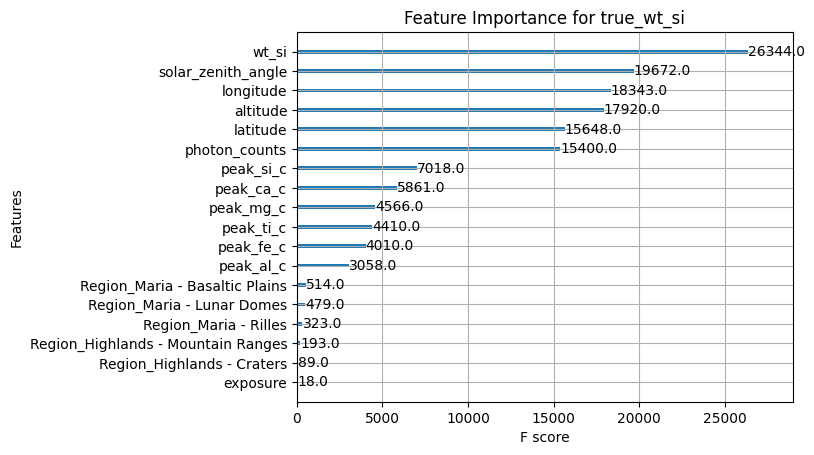

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualize feature importance for each output model
for output, model in models_si.items():
    print(f"Feature importance for {output}:")

    # Convert the model into the Booster object to access feature importance
    booster = model.get_booster()

    # Plot feature importance using XGBoost's built-in plot function
    xgb.plot_importance(booster, importance_type='weight', title=f"Feature Importance - {output}")

    # Customize and show the plot
    plt.title(f"Feature Importance for {output}")
    plt.show()

TRAINING MODEL FOR Mg

In [ ]:
tar=data['red_chi_2_mg'].quantile(.9)
mg=data[tar>data['red_chi_2_mg']]

In [ ]:
input_columns = [
'wt_mg', 'wt_al', 'wt_si', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
        'peak_si_c','peak_mg_c','peak_al_c','peak_ti_c','peak_fe_c','peak_ca_c', 'latitude', 'longitude',
        'Region_Highlands - Craters',
       'Region_Highlands - Mountain Ranges', 'Region_Maria - Basaltic Plains',
       'Region_Maria - Lunar Domes', 'Region_Maria - Rilles'
]
output_columns = ['true_wt_mg']

In [ ]:
X = mg[input_columns]
y = mg[output_columns]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Dictionary to store models for each output column
models_mg = {}

# Iterate through output columns and train a separate model for each
for output in output_columns:
    print(f"Training model for {output}...")
    regressor = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        learning_rate=0.05,
        max_depth=10,
        min_child_weight=3,
        gamma=0.1,
        subsample=1,
        colsample_bytree=.8,
       # L1 regularization

        random_state=42  # For reproducibilitya
    )
    regressor.fit(X_train, y_train[output])
    models_mg[output] = regressor

# Make predictions and evaluate the models
for output in output_columns:
    print(f"Evaluating model for {output}...")
    y_pred = models_mg[output].predict(X_test)
    mse = mean_squared_error(y_test[output], y_pred)
    print(f"Mean Squared Error for {output}: {mse}")
print(f"Evaluating model for {output}...")
y_pred = models_mg[output].predict(X_test)
r2 = r2_score(y_test[output], y_pred)
print(f"R² Score for {output}: {r2}")

Training model for true_wt_mg...
Evaluating model for true_wt_mg...
Mean Squared Error for true_wt_mg: 0.6625131450392859
Evaluating model for true_wt_mg...
R² Score for true_wt_mg: 0.761305175381257


Feature importance for true_wt_mg:


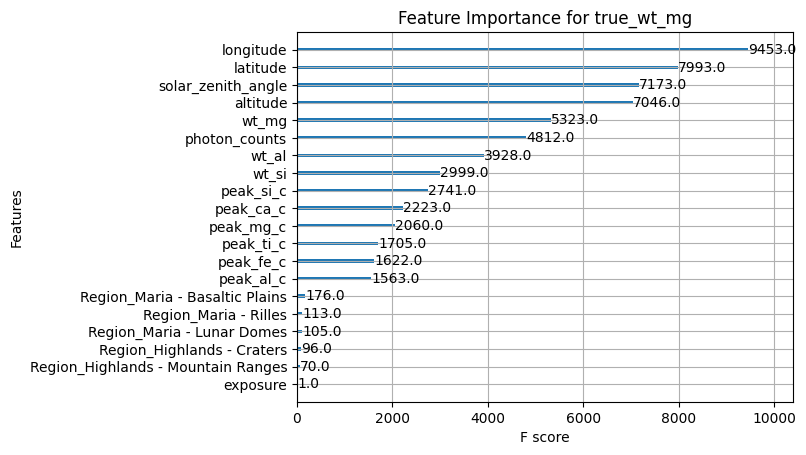

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualize feature importance for each output model
for output, model in models_mg.items():
    print(f"Feature importance for {output}:")

    # Convert the model into the Booster object to access feature importance
    booster = model.get_booster()

    # Plot feature importance using XGBoost's built-in plot function
    xgb.plot_importance(booster, importance_type='weight', title=f"Feature Importance - {output}")

    # Customize and show the plot
    plt.title(f"Feature Importance for {output}")
    plt.show()

In [ ]:
import joblib
import os

# Directory to save models
os.makedirs("models", exist_ok=True)

# Save each model in the dictionary
for output, model in models_mg.items():
    model_filename = f"models/{output}_model_final_new.pkl"
    joblib.dump(model, model_filename)
    print(f"Model for {output} saved to {model_filename}")

Model for true_wt_mg saved to models/true_wt_mg_model_final_new.pkl


TRAINING MODEL FOR Al

In [20]:
tar=data['red_chi_2_al'].quantile(.9)
al=data[tar>data['red_chi_2_al']]

In [21]:
input_columns = [
'wt_al', 'wt_si', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
        'peak_si_c','peak_mg_c','peak_al_c','peak_ti_c','peak_fe_c','peak_ca_c', 'latitude', 'longitude',
        'Region_Highlands - Craters',
       'Region_Highlands - Mountain Ranges', 'Region_Maria - Basaltic Plains',
       'Region_Maria - Lunar Domes', 'Region_Maria - Rilles'
]
output_columns = ['true_wt_al']

In [22]:
X = al[input_columns]
y = al[output_columns]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [23]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Dictionary to store models for each output column
models_al = {}

# Iterate through output columns and train a separate model for each
for output in output_columns:
    print(f"Training model for {output}...")
    regressor = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        learning_rate=0.1,
        max_depth=10,
        min_child_weight=3,
        # gamma=0,
        subsample=1,
        colsample_bytree=.8,
 # L1 regularization

        booster='gbtree',
        random_state=42  # For reproducibility
    )
    regressor.fit(X_train, y_train[output])
    models_al[output] = regressor

# Make predictions and evaluate the models
for output in output_columns:
    print(f"Evaluating model for {output}...")
    y_pred = models_al[output].predict(X_test)
    mse = mean_squared_error(y_test[output], y_pred)
    print(f"Mean Squared Error for {output}: {mse}")


print(f"Evaluating model for {output}...")
y_pred = models_al[output].predict(X_test)
r2 = r2_score(y_test[output], y_pred)
print(f"R² Score for {output}: {r2}")

Training model for true_wt_al...
Evaluating model for true_wt_al...
Mean Squared Error for true_wt_al: 2.020801714814687
Evaluating model for true_wt_al...
R² Score for true_wt_al: 0.8320640863662598


Feature importance for true_wt_al:


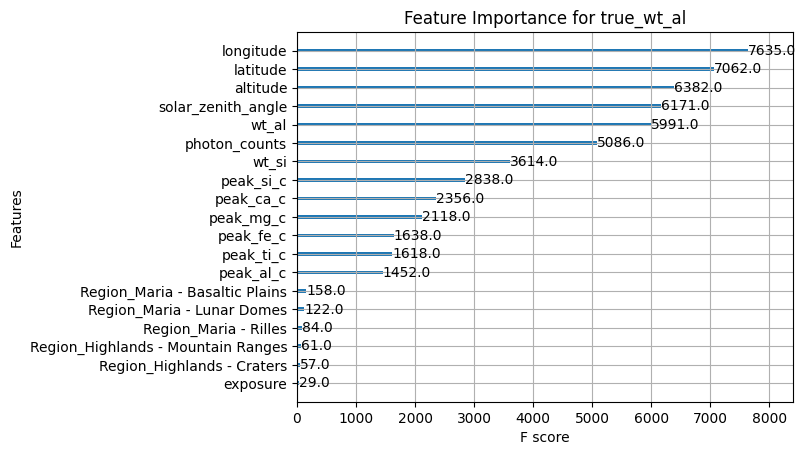

In [24]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualize feature importance for each output model
for output, model in models_al.items():
    print(f"Feature importance for {output}:")

    # Convert the model into the Booster object to access feature importance
    booster = model.get_booster()

    # Plot feature importance using XGBoost's built-in plot function
    xgb.plot_importance(booster, importance_type='weight', title=f"Feature Importance - {output}")

    # Customize and show the plot
    plt.title(f"Feature Importance for {output}")
    plt.show()

In [26]:
import joblib
import os

# Directory to save models
os.makedirs("models", exist_ok=True)

# Save each model in the dictionary
for output, model in models_al.items():
    model_filename = f"models/{output}_model_v4.pkl"
    joblib.dump(model, model_filename)
    print(f"Model for {output} saved to {model_filename}")

Model for true_wt_al saved to models/true_wt_al_model_v4.pkl


TRAINING MODEL FOR Fe

In [ ]:
tar=data['red_chi_2_fe'].quantile(.9)
fe=data[tar>data['red_chi_2_fe']]

In [ ]:
input_columns = [
'wt_mg', 'wt_al', 'wt_si','wt_fe', 'photon_counts',
       'solar_zenith_angle', 'emission_angle', 'altitude', 'exposure',
        'peak_si_c','peak_mg_c','peak_al_c','peak_ti_c','peak_fe_c','peak_ca_c', 'latitude', 'longitude',
        'Region_Highlands - Craters',
       'Region_Highlands - Mountain Ranges', 'Region_Maria - Basaltic Plains',
       'Region_Maria - Lunar Domes', 'Region_Maria - Rilles'
]
output_columns = ['true_wt_fe']

In [ ]:
X = fe[input_columns]
y = fe[output_columns]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Dictionary to store models for each output column
models_fe = {}

# Iterate through output columns and train a separate model for each
for output in output_columns:
    print(f"Training model for {output}...")
    regressor = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=400,
        learning_rate=0.05,
        max_depth=10,
        min_child_weight=7,
        gamma=0.3,
        subsample=1,
        colsample_bytree=.8,
 # L1 regularization

        booster='gbtree',
        random_state=42  # For reproducibility
    )
    regressor.fit(X_train, y_train[output])
    models_fe[output] = regressor

# Make predictions and evaluate the models
for output in output_columns:
    print(f"Evaluating model for {output}...")
    y_pred = models_fe[output].predict(X_test)
    mse = mean_squared_error(y_test[output], y_pred)
    print(f"Mean Squared Error for {output}: {mse}")


print(f"Evaluating model for {output}...")
y_pred = models_fe[output].predict(X_test)
r2 = r2_score(y_test[output], y_pred)
print(f"R² Score for {output}: {r2}")

Training model for true_wt_fe...
Evaluating model for true_wt_fe...
Mean Squared Error for true_wt_fe: 6.5909159633897785
Evaluating model for true_wt_fe...
R² Score for true_wt_fe: 0.7193049301457379


Feature importance for true_wt_fe:


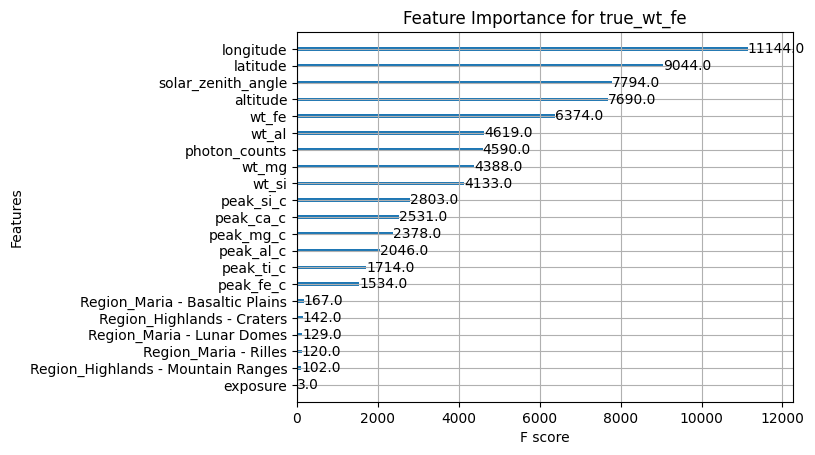

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualize feature importance for each output model
for output, model in models_fe.items():
    print(f"Feature importance for {output}:")

    # Convert the model into the Booster object to access feature importance
    booster = model.get_booster()

    # Plot feature importance using XGBoost's built-in plot function
    xgb.plot_importance(booster, importance_type='weight', title=f"Feature Importance - {output}")

    # Customize and show the plot
    plt.title(f"Feature Importance for {output}")
    plt.show()

In [ ]:
import joblib
import os

# Directory to save models
os.makedirs("models", exist_ok=True)

# Save each model in the dictionary
for output, model in models_fe.items():
    model_filename = f"models/{output}_model_final_new.pkl"
    joblib.dump(model, model_filename)
    print(f"Model for {output} saved to {model_filename}")

Model for true_wt_fe saved to models/true_wt_fe_model_final_new.pkl
